<a href="https://colab.research.google.com/github/kameshcodes/finance-learnings/blob/main/univariate_investment_risk_and_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univariate Investment Risk and Returns**


**We will learn:**
- how to analyze investment return distributions

## **What is Investment Risk ?**

- Risk in financial market is measure of uncertainity of future return
- variance/dispersion in Financial Returns
- skewness/kurtosis of daily return

They can have many definition but they fundamentally hinge on two things: **Return** and **Probability**

<br>

$\textbf{Type of Return: }$

---

| **Feature**             | **Discrete Returns**                                            | **Continuous Returns**                                          |
|-------------------------|----------------------------------------------------------------|-----------------------------------------------------------------|
| **Interpretation**       | Simple percentage change between two prices:                 | Logarithmic change assuming prices evolve continuously:        |
|                         | $R_{\text{discrete}} = \frac{P_t - P_{t-1}}{P_{t-1}}$         | $R_{\text{continuous}} = \ln\left(\frac{P_t}{P_{t-1}}\right)$  |
|                         | Example: A price change from 100 to 110 gives:            | Example: A price change from 100 to 110 gives:             |
|                         | $R_{\text{discrete}} = \frac{110 - 100}{100} = 0.10 \, (10\%)$  | $R_{\text{continuous}} = \ln\left(\frac{110}{100}\right) \approx 0.0953 \, (9.53\%)$ |
| **Additivity**           | Not additive over periods—must be compounded:                | Additive over periods—simple summation:                        |
|                         | $R_{\text{total}} = (1 + R_1)(1 + R_2) \cdots (1 + R_n) - 1$  | $R_{\text{total}} = R_1 + R_2 + \cdots + R_n$                  |
| **Mathematical Use**     | Intuitive and practical for everyday use.                   | Preferred in financial models (e.g., portfolio optimization).  |
| **Result for Gains**     | Higher for positive changes because of compounding effects.  | Slightly lower for positive changes (logarithmic scaling).     |


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [22]:
df = pd.read_csv('hdfc_stock_price_data.csv', parse_dates=['Date '])

df.shape

(126, 14)

$\textbf{Data: }$ **[Link](https://drive.google.com/file/d/19I5I087vV8Rj5NeucW_gS5deEYC4cl0l/view?usp=sharing)**

In [23]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [24]:
df.columns = ['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp',
       'close', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE',
       'No of trades'] #fix column_names
df.shape

(126, 14)

In [25]:
data = (
    df[['Date','OPEN', 'HIGH', 'LOW', 'close', 'vwap', 'VOLUME']]
    .set_index('Date', drop = True, inplace = False)
    .sort_index()
        )

###  Return on Closing Price
---

To calculate the **percentage change**, which is often referred to as the **return** in the context of financial time series, you can use the following formula:

$$
\text{Return}_t = \text{Percentage Change}_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100
$$

Where:

- $P_t$ = Closing price at time $t$
- $P_{t-1}$ = Closing price at time $t-1$

The **return** measures the rate of change in a stock's price from one period to the next and is typically expressed as a percentage.

<br>

**Note:** $pct\_change()$ can also be calculated using

```
data['Return'] = data.close.pct_change()
```
or
```
data['Return'] = (data.close - data.close.shift(1))/data.close.shift(1)
```


In [29]:
data['Return'] = data.close.pct_change()
data.head()

,OPEN,HIGH,LOW,close,vwap,VOLUME,Return
Date,,,,,,,
2024-06-12,571.70,577.75,569.60,572.70,574.27,"43,04,369",NaN
2024-06-13,565.00,598.40,565.00,593.50,590.02,"2,43,52,341",0.036319
2024-06-14,599.15,601.80,594.05,598.35,597.59,"73,08,942",0.008172
2024-06-18,596.85,605.00,591.80,601.20,600.35,"51,20,280",0.004763
2024-06-19,602.10,605.15,592.35,596.20,599.40,"44,53,729",-0.008317


- For first period **Return is NaN**, because there is no previous price to derive the return from

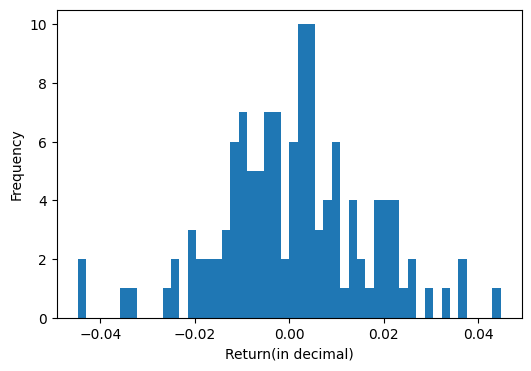

In [40]:
plt.figure(figsize=(6, 4))
plt.hist(data.Return.dropna(), bins=50, density = False)  # density = False -> plots `frequency` on y axis rather than `probability denisty`
plt.xlabel('Return(in decimal)')
plt.ylabel('Frequency')
plt.show()

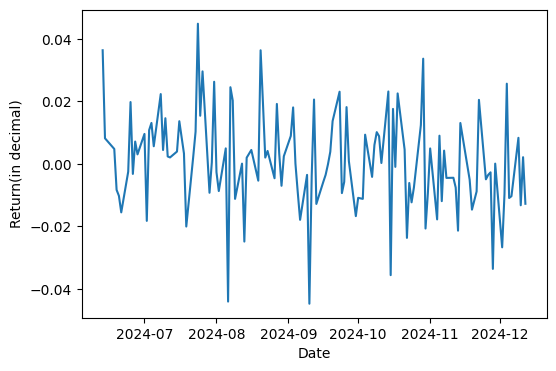

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(data.Return.dropna())
plt.xlabel('Date')
plt.ylabel('Return(in decimal)')
plt.show()

- Since Risk is measure of uncertainity of return. It is good practice to examine natural distribution of returns in order to better understand the Risk of Investment.

- Probability distributions have common properties called $moments$ which can be analyzed and compared to other distribution.

**Notes**
- financial distributions tends to be non normal
- as financial returns can have high kutosis

<br>
<br>

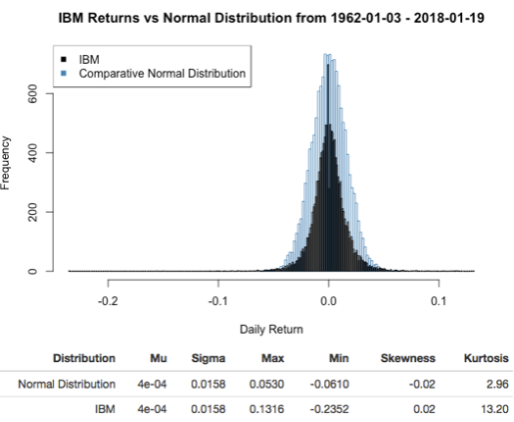

---

## **Average Returns**

 ### 1. Arithmetic Mean of Returns

 $$
\text{Arithmetic Mean} = \frac{1}{n} \sum_{i=1}^{n} \text{Return}_i
$$


 - It gives a simple average of the daily returns without adjusting for compounding over time. But, In **discrete** we should calculate **Compounded Returns**


```
# This is formatted as code
```


- Simple but, it ***does not account for the effects of compounding*** over time. This is a critical limitation in finance, where ***returns are typically reinvested*** and their effects compound over time.

  - For example, if you have two days of returns: +10% and -10%, the arithmetic mean would be 0%. However, the actual $\text{compounded return would be negative}$ because a 10% gain followed by a 10% loss doesn’t return to the original value.

In [43]:
np.mean(data['Return'])

0.0008407594353476826



  ---
<br>

### 2. Annualized Return


$$
\text{Annualized Return} = \left(1 + \text{Arithmetic Mean Return}\right)^{252} - 1
$$


- assumes that the average daily return will be compounded over 252 trading days
- If we expect an average return per day of $r$, then the cumulative return after $252$ days would be the product of $1 + r$ for each of those $252$ days
- assumes that the average daily return is reinvested each day at the same rate and compounds over time
- This assumes that the average daily return is reinvested each day, helping it grow over time.

In [44]:
((1+np.mean(data['Return']))**252)-1

0.2358788805712153



---

### 3. Total Compounded Return

<br>

$$
\text{Total Compounded Return} = \prod_{i=1}^{n} (1 + \text{Return}_i) - 1
$$

- It calculates the total compounded return over a period of time.
- It shows the actual total return for the whole period, considering how returns grow over time due to compounding.
- It's more accurate than the arithmetic mean because it shows how effects of compounding on return.








In [45]:
np.prod(1+data['Return'])-1

0.09402828706128741

---

<br>

### 4. Annualized Compounded Return

$$
\text{Annualized Compounded Return} = \left(1 + \text{Total Compounded Return}\right)^{\frac{252}{n}} - 1
$$


- Converts the total compounded return into a yearly return by adjusting for the time period in the data.
- Includes the effect of compounding and adjusts if the data doesn't cover a full year.


In [46]:
(1 + np.prod(1+data['Return'])-1) ** (252 / len(data['Return'])) - 1

0.19689789289025472

## **Standard deviation and Variance of Returns (Volatility)**

- investment with ***higher volatility*** $\implies$ ***higher risk***

In [48]:
np.std(data['Return']) #std_dev

0.015592339153380203

In [49]:
np.std(data['Return'])**2 #variance

0.00024312104027403327

$\textbf{Note :}$ Volatilty scales with square root of time

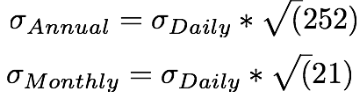

In [52]:
vol_monthly = np.std(data['Return'])*np.sqrt(21)
vol_monthly

0.07145307443178843

In [54]:
vol_annually = np.std(data['Return'])*np.sqrt(252)
vol_annually

0.24752071054571653

## **Skewness**

Skewness is a statistical measure that describes the **lack of symmetry** in the distribution of data. it quantifies the degree to which a distribution deviates from a normal distribution

$$
\text{Skewness} = \frac{n}{s^3} \sum_{i=1}^{n} (x_i - \bar{x})^3
$$

<br>
<br>

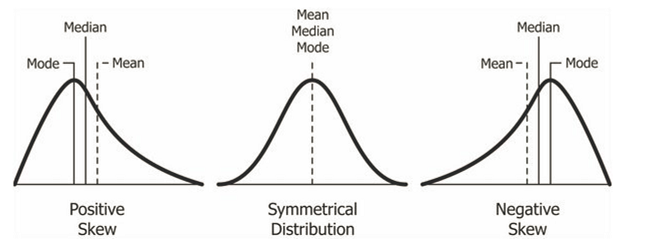


$\textbf{In Finance, We want our return to be positively Skewed.}$

a positively skewed return means most of the returns are around the average or lower, but there is a greater probability of big positive gains than big losses, because, while large gains are less frequent than average returns, they occur more often than large losses on the negative side.

This is good for investors because it offers more potential for high profits while keeping the risk of big losses smaller.

**Note:** Skewness provides valuable information about the shape of the return distribution, highlighting potential risks or opportunities associated with the investment

In [58]:
from scipy.stats import skew

skew(data.Return.dropna())

-0.050785309677584795

- a bit negatively skewed. $\textbf{DANGEROUS!}$

## **Kurtosis**

- it is measure of thickness of tails compared to normal distribution
- kurtosis tells you how much of the variance in a dataset is due to outliers or extreme values

$$
\text{Kurtosis} = \frac{n}{s^4} \sum_{i=1}^{n} (x_i - \bar{x})^4
$$


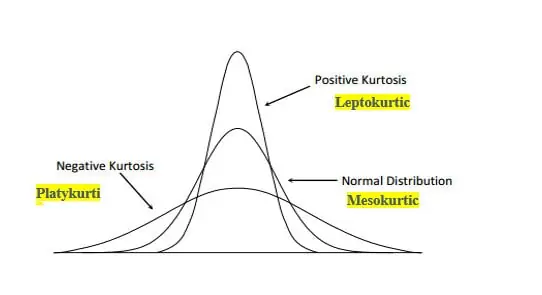

- **Leptokurtic distributions:** are often seen in financial returns where extreme events (like market crashes or surges) occur more frequently than expected by the normal distribution. This can indicate a higher risk of extreme losses or gains ie high volatility.
- **Platykurtic distributions:** suggest that extreme events are less frequent, and the returns are more uniformly distributed. Assets are less volatile
- **Mesokurtic distributions:** are similar to normal distributions, indicating no particular tendency for extreme events.

<br>

**Note**

In python, kurtosis function actually calculate ***excess kurtosis***:

$$
\text{Excess Kurtosis}=\text{Kurtosis}−3
$$

In [60]:
from scipy.stats import kurtosis

kurtosis(data['Return'].dropna())

0.6015120968205765

- distribution has slightly heavier tails than a normal distribution ie $Leptokurtic$(since normal distribution has an excess kurtosis of 0)
- so there are a few more extreme values (outliers) than we would expect in a normal distribution, but not a lot.
- if large movement in returns happens often, its a bad thing for a portfolio, if it moves in wrong direction.


**Note**

- Use **Shapiro Wilk test** for assessing normality when moment of return are close to normal.

<br>

$$
H_0: \text{The data follows a normal distribution.}
$$

In [63]:
from scipy.stats import shapiro

shapiro(data['Return'].dropna())[1]

0.3475705735388631

Since the p-value $>$ $0.05$, we conclude:

- The data is likely normally distributed, as we **fail to reject the null hypothesis**.